In [69]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline

In [70]:
cd D:\Projects\Policy Evaluation\dofiles\

D:\Projects\Policy Evaluation\dofiles


Go to LPIS shapefile folder

In [71]:
fp =  "..\input_data\leading_pedestrian_interval_signals_shapefile_2263\leading_pedestrian_interval_signals_shapefile_2263.shp"
LPIS_data = gpd.read_file(fp)

In [72]:
LPIS_data.head(3)

,MainStreet,CrossStree,Install_Da,ID,geometry
0,Vanderbilt Avenue,St Mark's Avenue,2018-01-08,1,POINT (992974.9999266018 186489.9997614889)
1,Guyon Avenue,So Railroad Avenue,2018-01-09,2,POINT (949031.9998856507 144943.9995205229)
2,Broadway,36 Street,2018-01-09,3,POINT (1006026.000071445 216210.9997024141)


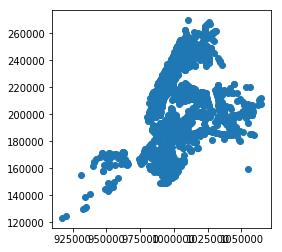

In [73]:
LPIS_data.plot()

In [74]:
LPIS_data.crs

{'proj': 'lcc',
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000.0000000001,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

Go to intersection shapefile folder

In [75]:
fp =  "..\input_data\intersection_unique_shapefile_2263\intersection_unique_shapefile_2263.shp"
intersection_data = gpd.read_file(fp)

In [76]:
intersection_data.head(3)

,fid,linearid,fullname,rttyp,mtfcc,linearid_2,fullname_2,rttyp_2,mtfcc_2,longitude,latitude,bcode,bname,name,namelsad,geometry
0,1.0,1101042239898,Baldwin St,M,S1400,1101042288995,None,None,S1640,1025301.152,270701.9341,36005,Bronx,Bronx,Bronx County,POINT (1025301.15279018 270701.934121847)
1,2.0,1101042239898,Baldwin St,M,S1400,1102175695960,Bradley St,M,S1400,1025194.172,270543.9926,36005,Bronx,Bronx,Bronx County,POINT (1025194.172990974 270543.9926886206)
2,7.0,1101042288995,None,None,S1640,1103717136022,Baldwin St,M,S1400,1025251.612,270739.3774,36005,Bronx,Bronx,Bronx County,POINT (1025251.612085536 270739.3774560128)


In [77]:
type(intersection_data)

geopandas.geodataframe.GeoDataFrame

In [78]:
intersection_data.crs

{'proj': 'lcc',
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000.0000000001,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

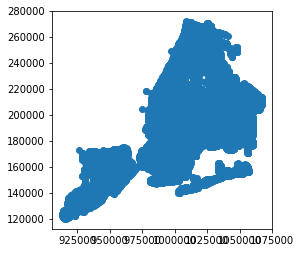

In [79]:
intersection_data.plot()

Create unary union from Points, which basically creates a MultiPoint object from the Point geometries.

In [86]:
def nearest(row, geom_union, df1, df2, geom1_col='geometry', geom2_col='geometry', src_column=None):
    """Find the nearest point and return the corresponding value from specified column."""
    # Find the geometry that is closest
    nearest = df2[geom2_col] == nearest_points(row[geom1_col], geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    value = df2[nearest][src_column].get_values()[0]
    return value

In [87]:
intersection_unary_union = intersection_data.unary_union

In [88]:
LPIS_unary_union = LPIS_data.unary_union

In [89]:
intersection_data['nearest_id'] = intersection_data.apply(nearest, geom_union=LPIS_unary_union, df1=intersection_data, df2=LPIS_data, geom1_col='geometry',geom2_col='geometry', src_column='ID', axis=1)


In [90]:
intersection_data.head(3)

,fid,linearid,fullname,rttyp,mtfcc,linearid_2,fullname_2,rttyp_2,mtfcc_2,longitude,latitude,bcode,bname,name,namelsad,geometry,nearest_id
0,1.0,1101042239898,Baldwin St,M,S1400,1101042288995,None,None,S1640,1025301.152,270701.9341,36005,Bronx,Bronx,Bronx County,POINT (1025301.15279018 270701.934121847),1767
1,2.0,1101042239898,Baldwin St,M,S1400,1102175695960,Bradley St,M,S1400,1025194.172,270543.9926,36005,Bronx,Bronx,Bronx County,POINT (1025194.172990974 270543.9926886206),1767
2,7.0,1101042288995,None,None,S1640,1103717136022,Baldwin St,M,S1400,1025251.612,270739.3774,36005,Bronx,Bronx,Bronx County,POINT (1025251.612085536 270739.3774560128),1767
